Yaprak Sınıflandırması
Gerekli Kütüphanelerin Eklenmesi

In [162]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


Test ve Eğitim Verilerinin Okunması


In [163]:
train=pd.read_csv("C:/Users/omerk/Documents/GitHub/yapayzeka/hafta8/yaprakveriseti/train.csv")
test=pd.read_csv("C:/Users/omerk/Documents/GitHub/yapayzeka/hafta8/yaprakveriseti/test.csv")

Sınıfların Belirlenmesi ve Etiketlenmesi


In [164]:
label_encoder=LabelEncoder().fit(train.species)
labels=label_encoder.transform(train.species)
classes =list(label_encoder.classes_)

Verilerin Hazırlanması , Özellik ve Sınıf Sayısının Belirlenmesi 

In [165]:
train=train.drop(["id","species"],axis=1)
test=test.drop(["id"],axis=1)
nb_features=192
nb_classes=len(classes)

Eğitim Verilerinin Standartlaştırılması

In [166]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(train.values)
train=scaler.transform(train.values)

Eğitim Verisinin Eğitim ve Doğrulama İçin Ayarlanması

In [167]:
from sklearn.model_selection import train_test_split
x_train , x_valid , y_train , y_valid = train_test_split(train, labels ,test_size=0.1)

Etiketlerin kategorileştirilmesi


In [168]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)

x_train=np.array(x_train).reshape(891,192,1)
x_valid=np.array(x_valid).reshape(99,192,1)

Modelin oluşturulması 


In [169]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Conv1D,Dropout,MaxPooling1D,Flatten

model=Sequential()
model.add(Conv1D(512,1,input_shape=(nb_features,1)))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(Conv1D(256,1))
model.add(Activation("relu"))
model.add(MaxPooling1D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2048,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(nb_classes,activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 192, 512)          1024      
                                                                 
 activation_10 (Activation)  (None, 192, 512)          0         
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 96, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 96, 256)           131328    
                                                                 
 activation_11 (Activation)  (None, 96, 256)           0         
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 48, 256)          0         
 g1D)                                                 

Ağın Derlenmesi

In [170]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

Modelin Eğitilmesi


In [171]:
model.fit(x_train,y_train,epochs=15,validation_data=(x_valid,y_valid))

Epoch 1/15
28/28 [==============================] - 14s 481ms/step - loss: 3.5663 - accuracy: 0.2267 - val_loss: 1.9630 - val_accuracy: 0.4949
Epoch 2/15
28/28 [==============================] - 14s 511ms/step - loss: 0.9505 - accuracy: 0.7565 - val_loss: 1.4199 - val_accuracy: 0.6667
Epoch 3/15
28/28 [==============================] - 13s 459ms/step - loss: 0.3487 - accuracy: 0.9136 - val_loss: 0.9514 - val_accuracy: 0.7475
Epoch 4/15
28/28 [==============================] - 13s 465ms/step - loss: 0.1538 - accuracy: 0.9596 - val_loss: 0.6803 - val_accuracy: 0.8889
Epoch 5/15
28/28 [==============================] - 13s 476ms/step - loss: 0.1666 - accuracy: 0.9585 - val_loss: 0.6849 - val_accuracy: 0.8788
Epoch 6/15
28/28 [==============================] - 14s 489ms/step - loss: 0.0887 - accuracy: 0.9787 - val_loss: 0.6652 - val_accuracy: 0.8485
Epoch 7/15
28/28 [==============================] - 13s 482ms/step - loss: 0.0838 - accuracy: 0.9832 - val_loss: 0.6599 - val_accuracy: 0.8788

Ortalama Değerlerin Gösterilmesi


In [172]:
#accuracy yerine f1score, kesinlik(precision) , duyarlılık(sensivity) ve özgüllük(specificity)

In [175]:
print(("Ortalama Eğitim Kaybı: ",np.mean(model.history.history["loss"])))
print(("Ortalama Eğitim Başarımı: ",np.mean(model.history.history["accuracy"])))
print(("Ortalama Doğrulama Kaybı: ",np.mean(model.history.history["val_loss"])))
print(("Ortalama Doğrulama Başarımı: ",np.mean(model.history.history["val_accuracy"])))

('Ortalama Eğitim Kaybı: ', 0.3707367708935635)
('Ortalama Eğitim Başarımı: ', 0.9164234866698583)
('Ortalama Doğrulama Kaybı: ', 0.7698850194613139)
('Ortalama Doğrulama Başarımı: ', 0.8491582453250885)


Değerlerin grafik üzerinde gösterilmesi



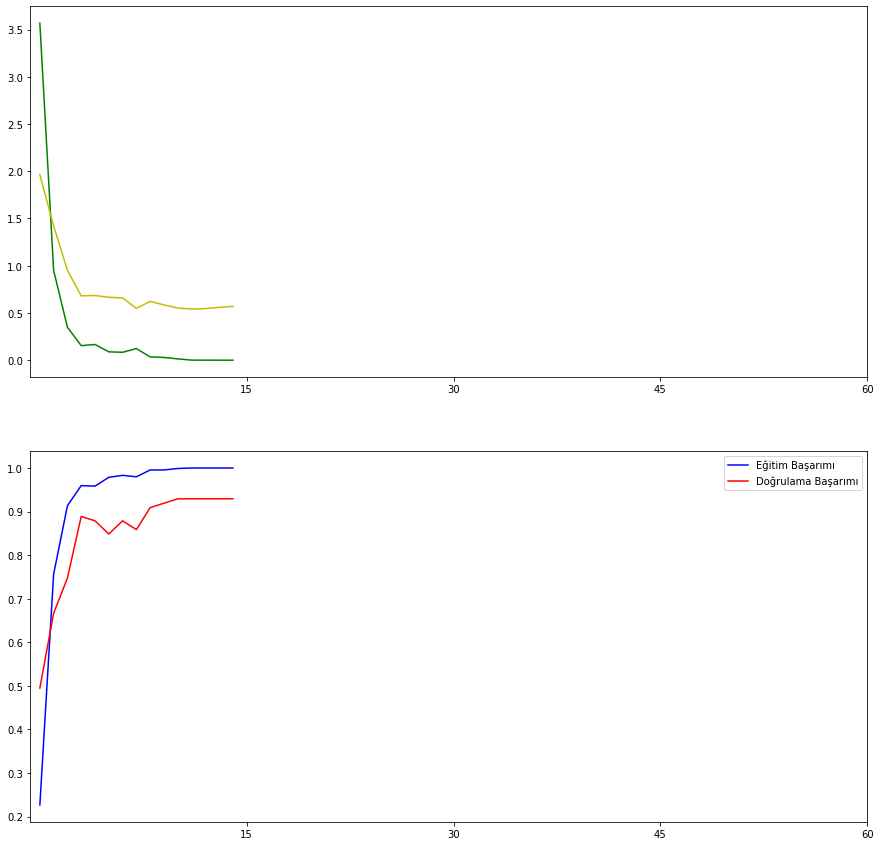

In [176]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,15))
ax1.plot(model.history.history['loss'],color='g',label="Eğitim Kaybı")
ax1.plot(model.history.history['val_loss'],color='y',label="Doğrulama kaybı")
ax1.set_xticks(np.arange(15,75,15))
ax2.plot(model.history.history['accuracy'],color='b',label="Eğitim Başarımı")
ax2.plot(model.history.history['val_accuracy'],color='r',label="Doğrulama Başarımı")
ax2.set_xticks(np.arange(15,75,15))
plt.legend()
plt.show()